In [167]:
#Understanding the Dataset

In [168]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [169]:
df=pd.read_csv("housing.csv") 
ds=df.copy()

In [170]:
ds.shape

(4600, 18)

In [171]:
set(ds)

{'bathrooms',
 'bedrooms',
 'city',
 'condition',
 'country',
 'date',
 'floors',
 'price',
 'sqft_above',
 'sqft_basement',
 'sqft_living',
 'sqft_lot',
 'statezip',
 'street',
 'view',
 'waterfront',
 'yr_built',
 'yr_renovated'}

In [172]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4560 non-null   float64
 5   sqft_lot       4586 non-null   float64
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4577 non-null   float64
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4543 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [173]:
ds.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4560.000000,4.586000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4577.000000,4600.000000
mean,5.539483e+05,3.400870,2.160815,2138.935526,1.485981e+04,1.512065,0.007174,0.240652,3.451739,1840.825435,312.081522,1970.808827,808.608261
std,5.808371e+05,0.908848,0.783781,965.011449,3.592050e+04,0.538288,0.084404,0.778405,0.677230,970.705795,464.137228,29.724793,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,350.000000,0.000000,1900.000000,0.000000
25%,3.225000e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.610000e+05,3.000000,2.250000,1980.000000,7.683500e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.550000e+05,4.000000,2.500000,2620.000000,1.101850e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,20450.000000,4820.000000,2014.000000,2014.000000


In [174]:
ds.isnull().sum()

date              0
price             0
bedrooms          0
bathrooms         0
sqft_living      40
sqft_lot         14
floors            0
waterfront        0
view              0
condition         0
sqft_above        0
sqft_basement     0
yr_built         23
yr_renovated      0
street            0
city             57
statezip          0
country           0
dtype: int64

In [175]:
#Cleaning the Dataset
#1. Handle missing values

In [176]:
print("No of Duplicates :",ds.duplicated().sum())

No of Duplicates : 0


In [177]:
ds["sqft_living"] = ds["sqft_living"].fillna(ds["sqft_living"].median())
ds["sqft_lot"] = ds["sqft_lot"].fillna(ds["sqft_lot"].median())

In [178]:
city_grp = ds.groupby('statezip')['city'].unique()
city_grp

statezip
WA 98001                        [Auburn, Algona, Federal Way]
WA 98002                                             [Auburn]
WA 98003                                   [nan, Federal Way]
WA 98004    [Bellevue, Clyde Hill, Yarrow Point, Beaux Art...
WA 98005                                           [Bellevue]
                                  ...                        
WA 98188                                    [SeaTac, Tukwila]
WA 98198             [nan, Des Moines, SeaTac, Normandy Park]
WA 98199                                       [nan, Seattle]
WA 98288                                          [Skykomish]
WA 98354                                             [Milton]
Name: city, Length: 77, dtype: object

In [179]:
city_map = ds.groupby('statezip')['city'].agg(lambda x: x.mode()[0])
ds['city'] = ds['city'].fillna(ds['statezip'].map(city_map))

In [180]:
ds.isnull().sum()

date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
sqft_above        0
sqft_basement     0
yr_built         23
yr_renovated      0
street            0
city              0
statezip          0
country           0
dtype: int64

In [181]:
ds["yr_built"]=ds["yr_built"].fillna(ds["yr_built"].median())

In [182]:
ds.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [183]:
#2. Fix Formatting & Detect Inconsistencies

In [184]:
ds['date'] = ds['date'].astype(str).str.strip()


In [185]:
print(ds['date'].unique()[:20])

['02/05/2014 0:00' '03/05/2014 0:00' '04/05/2014 0:00' '05/05/2014 0:00'
 '06/05/2014 0:00' '07/05/2014 0:00' '08/05/2014 0:00' '09/05/2014 0:00'
 '10/05/2014 0:00' '11/05/2014 0:00' '12/05/2014 0:00' '13/05/2014 0:00'
 '14/05/2014 0:00' '15/05/2014 0:00' '16/05/2014 0:00' '17/05/2014 0:00'
 '18/05/2014 0:00' '19/05/2014 0:00' '20/05/2014 0:00' '21/05/2014 0:00']


In [186]:
#Date
from datetime import datetime
ds['date'] = pd.to_datetime(ds['date'], format='%d/%m/%Y %H:%M', errors='coerce')
ds['date'] = ds['date'].dt.date

In [187]:
#Objects or String
ds['city'] = ds['city'].str.title().str.strip()
ds['street'] = ds['street'].str.title().str.strip()
ds['statezip'] = ds['statezip'].str.upper().str.strip()
ds['country'] = ds['country'].str.upper().str.strip()
ds.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0,3,1.50,1340.0,7683.5,1.5,0,0,3,1340,0,1955.0,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.0,5,2.50,3650.0,7683.5,2.0,0,4,5,3370,280,1921.0,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000.0,3,2.00,1930.0,7683.5,1.0,0,0,4,1930,0,1966.0,0,26206-26214 143Rd Ave Se,Kent,WA 98042,USA
3,2014-05-02,420000.0,3,2.25,2000.0,7683.5,1.0,0,0,4,1000,1000,1963.0,0,857 170Th Pl Ne,Bellevue,WA 98008,USA
4,2014-05-02,550000.0,4,2.50,1940.0,7683.5,1.0,0,0,4,1140,800,1976.0,1992,9105 170Th Ave Ne,Redmond,WA 98052,USA


In [188]:
print("Minimum Floors :",ds['floors'].min())
print("Maximum Floors :",ds['floors'].max())

Minimum Floors : 1.0
Maximum Floors : 3.5


In [189]:
# Logical validation
ds = ds[ds['bedrooms'] >= 1]
ds = ds[ds['bathrooms'] >= 0.5]
ds = ds[ds['condition'].between(1, 5)]
ds = ds[ds['view'].between(0, 4)]
ds = ds[ds['floors'].between(0.5, 3.5)]
ds = ds[ds['waterfront'].isin([0, 1])]
ds.tail() 

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09,308166.6667,3,1.75,1510.0,6360.0,1.0,0,0,4,1510,0,1976.0,1979,501 N 143Rd St,Seattle,WA 98133,USA
4596,2014-07-09,534333.3333,3,2.50,1460.0,7573.0,2.0,0,0,3,1460,0,1976.0,2009,14855 Se 10Th Pl,Bellevue,WA 98007,USA
4597,2014-07-09,416904.1667,3,2.50,3010.0,7014.0,2.0,0,0,3,3010,0,1976.0,0,759 Ilwaco Pl Ne,Renton,WA 98059,USA
4598,2014-07-10,203400.0000,4,2.00,2090.0,6630.0,1.0,0,0,3,1070,1020,1976.0,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10,220600.0000,3,2.50,1490.0,8102.0,2.0,0,0,4,1490,0,1976.0,0,18717 Se 258Th St,Covington,WA 98042,USA


In [190]:
ds[ds['price']<100000]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
21,2014-05-02,20000.0,4,1.00,1450.0,8800.0,1.0,0,0,4,1450,0,1954.0,1979,3922 154Th Ave Se,Bellevue,WA 98006,USA
588,2014-05-13,90000.0,2,1.00,790.0,2640.0,1.0,0,0,3,790,0,1973.0,2013,14710 122Nd Pl Ne,Kirkland,WA 98034,USA
1219,2014-05-23,80000.0,1,0.75,430.0,5050.0,1.0,0,0,2,430,0,1912.0,0,32215 E Rutherford St,Carnation,WA 98014,USA
1283,2014-05-23,90000.0,2,1.00,580.0,7500.0,1.0,0,0,3,580,0,1943.0,2002,6621 S 131St Pl,Seattle,WA 98178,USA
1587,2014-05-29,83000.0,2,1.00,900.0,8580.0,1.0,0,0,3,900,0,1918.0,0,14440 51St Ave S,Tukwila,WA 98168,USA
4345,2014-06-01,84350.0,4,2.00,2630.0,16475.0,2.0,0,0,4,2630,0,1953.0,1983,9033 Ne 32Nd St,Yarrow Point,WA 98004,USA
4351,2014-05-06,7800.0,2,1.00,780.0,16344.0,1.0,0,0,1,780,0,1942.0,0,4229 S 144Th St,Tukwila,WA 98168,USA
4354,2014-05-05,0.0,3,1.75,1490.0,10125.0,1.0,0,0,4,1490,0,1962.0,0,3911 S 328Th St,Federal Way,WA 98001,USA
4356,2014-05-05,0.0,4,2.75,2600.0,5390.0,1.0,0,0,4,1300,1300,1960.0,2001,2120 31St Ave W,Seattle,WA 98199,USA
4357,2014-05-05,0.0,6,2.75,3200.0,9200.0,1.0,0,2,4,1600,1600,1953.0,1983,12271 Marine View Dr Sw,Burien,WA 98146,USA


In [191]:
ds['total_sqft'] = ds['sqft_living'] + ds['sqft_basement']

In [192]:
#Price Assumption
pr = ds['price'].mean()
tot_sqft = ds['total_sqft'].mean()
one_sqfeet = pr/tot_sqft
print("AVG PRICE OF PER SQUARE FEET = ",one_sqfeet)

AVG PRICE OF PER SQUARE FEET =  226.0808650825318


In [193]:
ds.loc[ds['price'] == 0, 'price'] = ds['total_sqft'] * one_sqfeet
ds['price']=ds['price'].astype(int)

In [194]:
check_0 = ds[ds['price']==0]
check_0

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,total_sqft


In [195]:
ds['yr_built'].min()

np.float64(1900.0)

In [196]:
#year
current_year = datetime.now().year
ds = ds[ds['yr_built'].between(1900, current_year)]
ds['yr_built'] = ds['yr_built'].round(0).astype(int)
ds.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,total_sqft
0,2014-05-02,313000,3,1.5,1340.0,7683.5,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,1340.0
1,2014-05-02,2384000,5,2.5,3650.0,7683.5,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,3930.0
2,2014-05-02,342000,3,2.0,1930.0,7683.5,1.0,0,0,4,1930,0,1966,0,26206-26214 143Rd Ave Se,Kent,WA 98042,USA,1930.0


In [197]:
ds['sqft_basement'] = ds['sqft_living'] - ds['sqft_above']
ds.tail(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,total_sqft
4590,2014-07-08,380680,4,2.50,2620.0,8331.0,2.0,0,0,3,2620,0.0,1976,0,13602 Se 186Th Pl,Renton,WA 98058,USA,2620.0
4591,2014-07-08,396166,3,1.75,1880.0,5752.0,1.0,0,0,4,940,940.0,1976,0,3529 Sw Webster St,Seattle,WA 98126,USA,2820.0
4592,2014-07-08,252980,4,2.50,2530.0,8169.0,2.0,0,0,3,2530,0.0,1976,0,37654 18Th Pl S,Federal Way,WA 98003,USA,2530.0
4593,2014-07-08,289373,3,2.50,2538.0,4600.0,2.0,0,0,3,2538,0.0,1976,1923,5703 Charlotte Ave Se,Auburn,WA 98092,USA,2538.0
4594,2014-07-09,210614,3,2.50,1610.0,7223.0,2.0,0,0,3,1610,0.0,1976,0,26306 127Th Ave Se,Kent,WA 98030,USA,1610.0
4595,2014-07-09,308166,3,1.75,1510.0,6360.0,1.0,0,0,4,1510,0.0,1976,1979,501 N 143Rd St,Seattle,WA 98133,USA,1510.0
4596,2014-07-09,534333,3,2.50,1460.0,7573.0,2.0,0,0,3,1460,0.0,1976,2009,14855 Se 10Th Pl,Bellevue,WA 98007,USA,1460.0
4597,2014-07-09,416904,3,2.50,3010.0,7014.0,2.0,0,0,3,3010,0.0,1976,0,759 Ilwaco Pl Ne,Renton,WA 98059,USA,3010.0
4598,2014-07-10,203400,4,2.00,2090.0,6630.0,1.0,0,0,3,1070,1020.0,1976,0,5148 S Creston St,Seattle,WA 98178,USA,3110.0
4599,2014-07-10,220600,3,2.50,1490.0,8102.0,2.0,0,0,4,1490,0.0,1976,0,18717 Se 258Th St,Covington,WA 98042,USA,1490.0


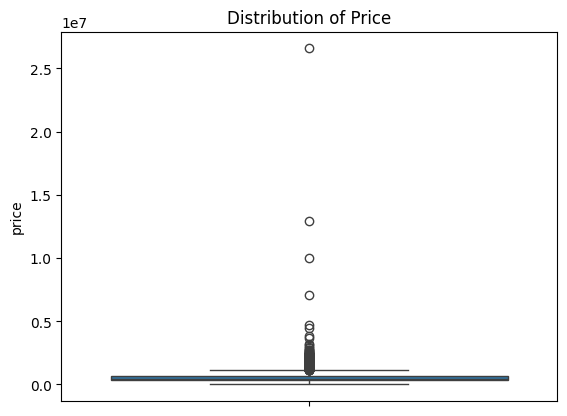

In [198]:
#Finding Outliers
sns.boxplot(ds['price'])
plt.title("Distribution of Price")
plt.show()

In [199]:
ds[ds['price']>10000000]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,total_sqft
4346,2014-06-23,12899000,3,2.5,2190.0,11394.0,1.0,0,0,3,1550,640.0,1956,2001,5426 40Th Ave W,Seattle,WA 98199,USA,2830.0
4350,2014-07-03,26590000,3,2.0,1180.0,7793.0,1.0,0,0,4,1180,0.0,1992,0,12005 Se 219Th Ct,Kent,WA 98031,USA,1180.0


In [200]:
#Statistical Detection Using IQR Method
Q1 = ds['price'].quantile(0.25)
Q3 = ds['price'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Calculate median price
median_price = ds['price'].median()

# Detect outliers
outliers = ds[(ds['price'] < lower_bound) | (ds['price'] > upper_bound)]
outliers

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,total_sqft
1,2014-05-02,2384000,5,2.50,3650.0,7683.5,2.0,0,4,5,3370,280.0,1921,0,709 W Blaine St,Seattle,WA 98119,USA,3930.0
8,2014-05-02,10000000,3,2.50,2430.0,7683.5,1.0,0,0,4,1570,860.0,1985,0,46611-46625 Se 129Th St,North Bend,WA 98045,USA,3290.0
11,2014-05-02,1400000,4,2.50,2920.0,7683.5,1.5,0,0,5,1910,1010.0,1909,1988,3838-4098 44Th Ave Ne,Seattle,WA 98105,USA,3930.0
14,2014-05-02,1200000,5,2.75,2910.0,9480.0,1.5,0,0,3,2910,0.0,1939,1969,3534 46Th Ave Ne,Seattle,WA 98105,USA,2910.0
99,2014-05-05,1395000,5,3.50,4010.0,8510.0,2.0,0,1,5,2850,1160.0,1971,0,3930 Ne Belvoir Pl,Seattle,WA 98105,USA,5170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4467,2014-06-06,1337044,4,3.50,4280.0,9583.0,2.0,0,0,3,4280,0.0,2005,0,1415 108Th Ave Se,Bellevue,WA 98004,USA,4280.0
4523,2014-06-23,1519263,3,4.50,5230.0,17826.0,2.0,1,4,3,3740,1490.0,2005,0,7455 W Mercer Way,Mercer Island,WA 98040,USA,6720.0
4528,2014-06-24,1469525,4,5.00,4550.0,18641.0,1.0,1,4,3,2600,1950.0,2002,0,425 E Lake Sammamish Pkwy Se,Sammamish,WA 98074,USA,6500.0
4572,2014-07-02,1288333,6,4.50,3830.0,4800.0,3.0,0,0,3,3050,780.0,1919,2004,2425 3Rd Ave W,Seattle,WA 98119,USA,4610.0


In [201]:
# Replace only prices greater than 10,000,000
ds.loc[ds['price'] > 10000000, 'price'] = median_price

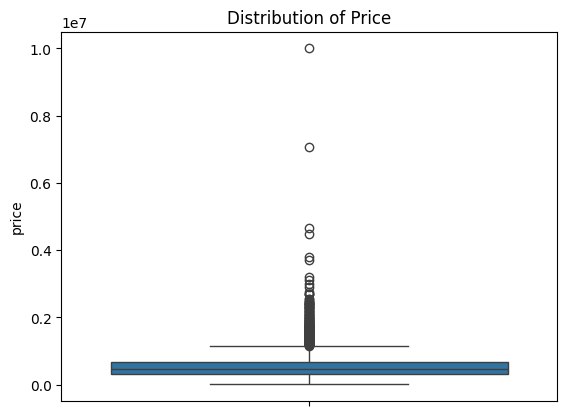

In [202]:
sns.boxplot(ds['price'])
plt.title("Distribution of Price")
plt.show()

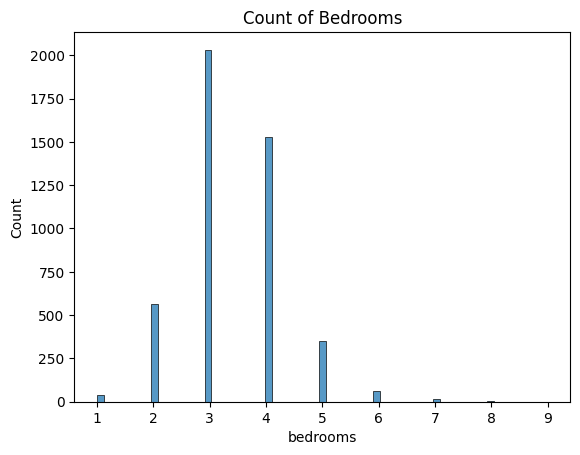

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


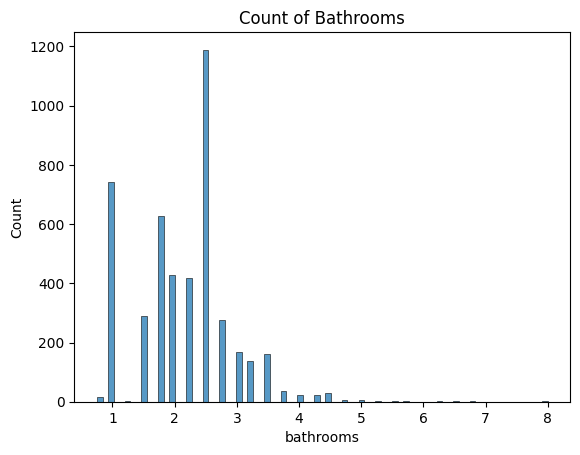

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


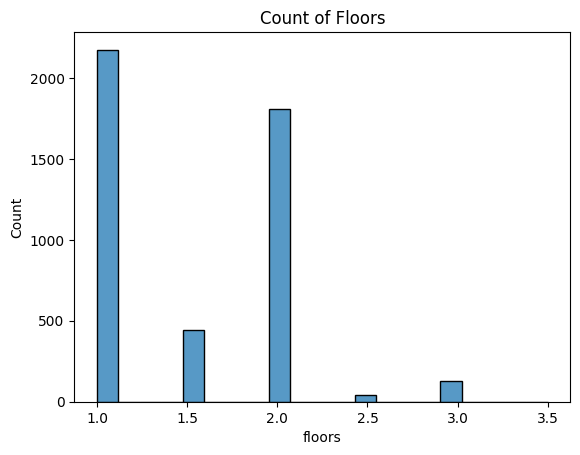

In [203]:
#Finding Outliers For Bedroom
sns.histplot(x='bedrooms', data=ds)
plt.title("Count of Bedrooms")
plt.show()

print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

#Finding Outliers For Bathrooms
sns.histplot(x='bathrooms', data=ds)
plt.title("Count of Bathrooms")
plt.show()

print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

#Finding Outliers For Floors
sns.histplot(x='floors', data=ds)
plt.title("Count of Floors")
plt.show()



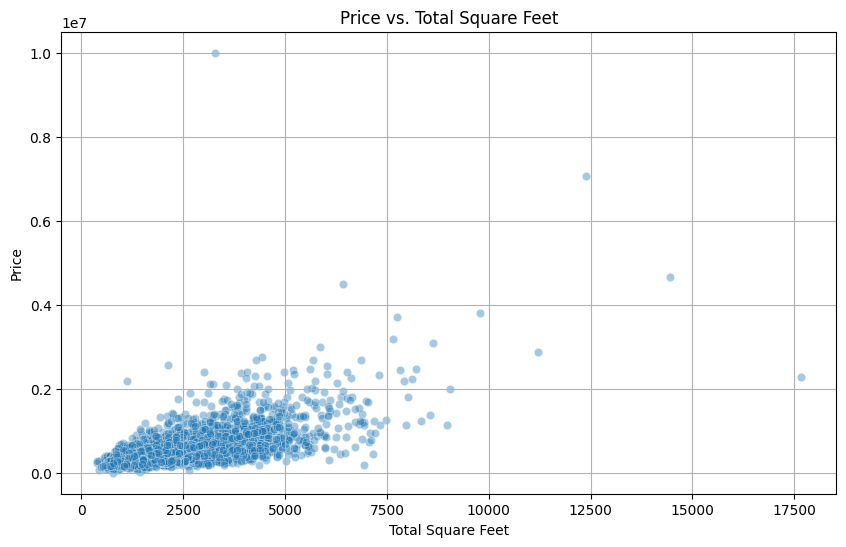

In [204]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_sqft', y='price', data=ds, alpha=0.4)
plt.title('Price vs. Total Square Feet')
plt.xlabel('Total Square Feet')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [205]:
#EDA Data Visualization
#1. Univariate Analysis

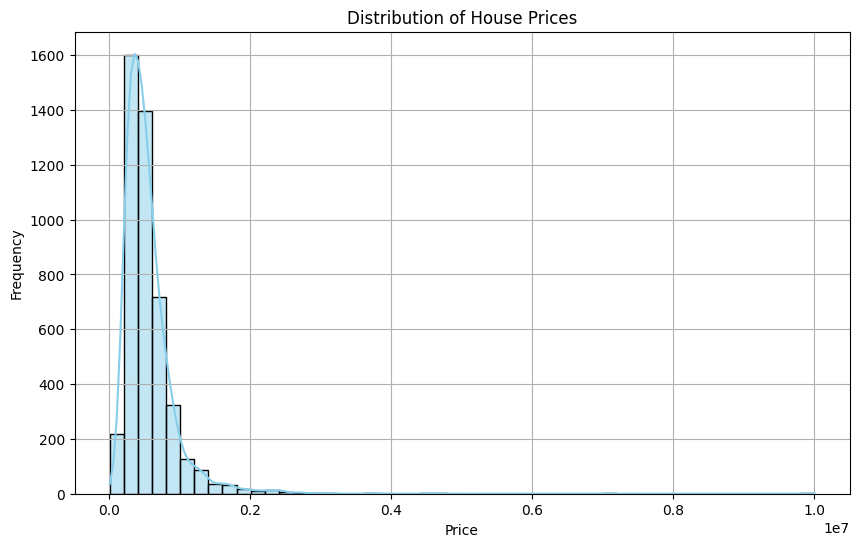

In [206]:
# Histogram of price
plt.figure(figsize=(10, 6))
sns.histplot(ds['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

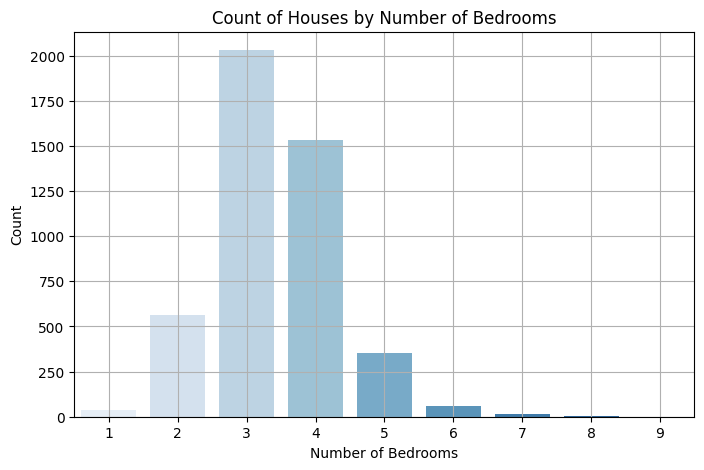

In [207]:
# Countplot of number of bedrooms
plt.figure(figsize=(8, 5))
sns.countplot(x='bedrooms', data=ds, palette='Blues')
plt.title('Count of Houses by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.grid(True)
plt.show()


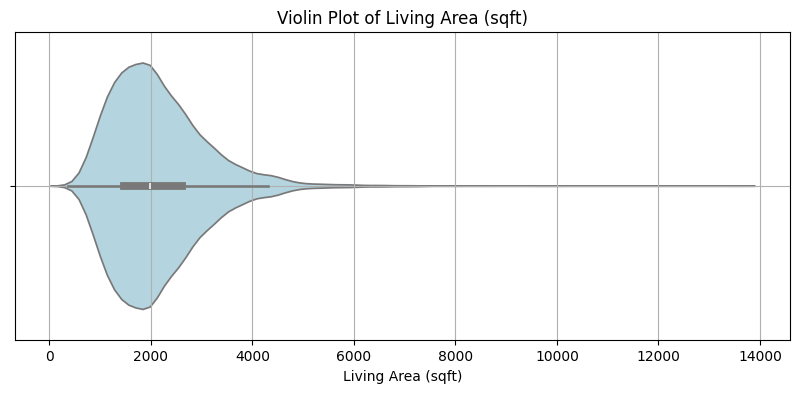

In [208]:
plt.figure(figsize=(10, 4))
sns.violinplot(x=ds['sqft_living'], color='lightblue')
plt.title('Violin Plot of Living Area (sqft)')
plt.xlabel('Living Area (sqft)')
plt.grid(True)
plt.show()


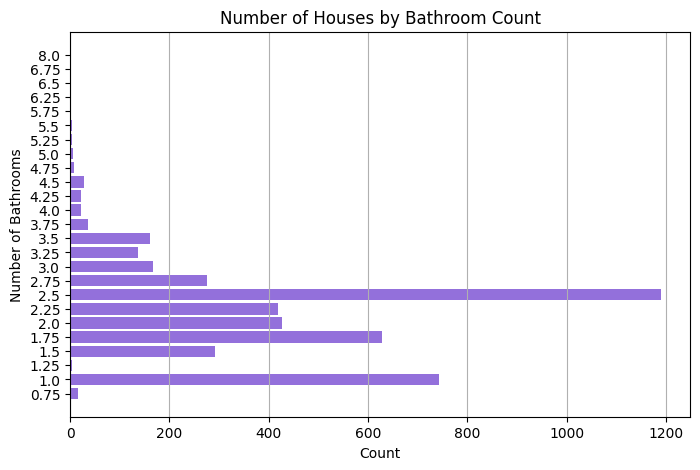

In [209]:
# Count number of houses by bathroom
bathroom_counts = ds['bathrooms'].value_counts().sort_index()

# Plot horizontal bar chart
plt.figure(figsize=(8, 5))
plt.barh(bathroom_counts.index.astype(str), bathroom_counts.values, color='mediumpurple')
plt.title('Number of Houses by Bathroom Count')
plt.xlabel('Count')
plt.ylabel('Number of Bathrooms')
plt.grid(axis='x')
plt.show()

In [210]:
#2. Bivariate Analysis

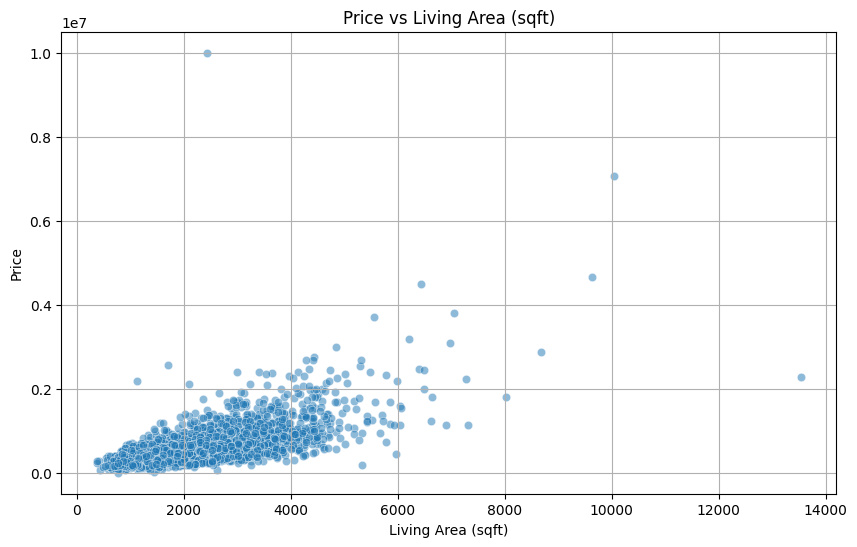

In [211]:
# Scatter plot  price vs Sqft Living
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=ds, alpha=0.5)
plt.title('Price vs Living Area (sqft)')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price')
plt.grid(True)
plt.show()

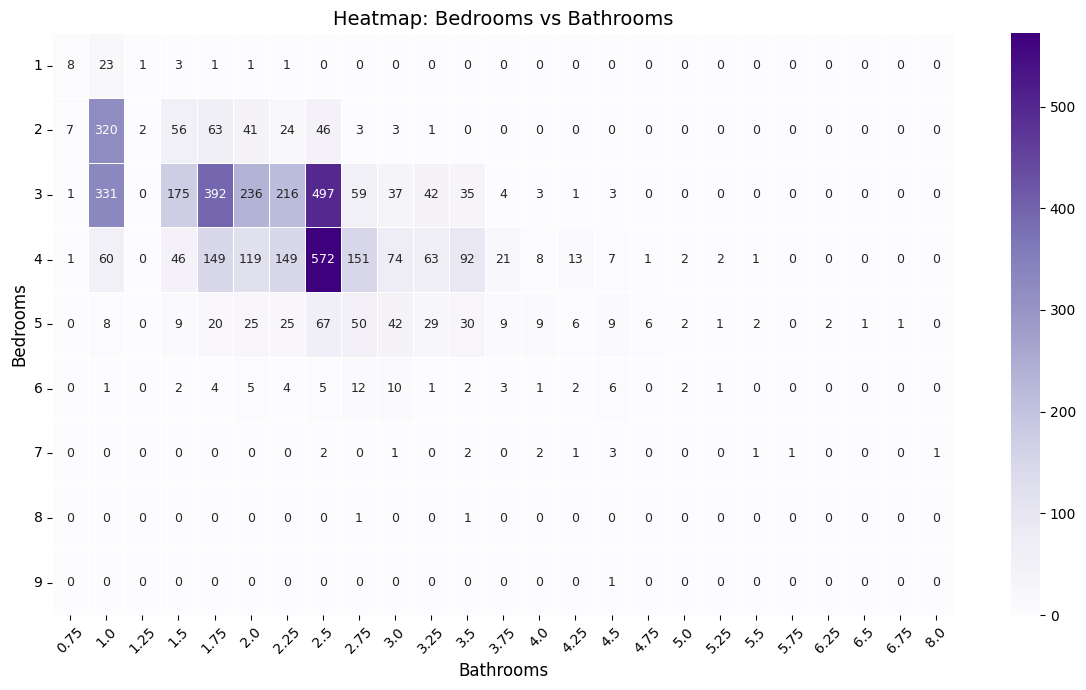

In [212]:
# Grouping
bed_bath = ds.groupby(['bedrooms', 'bathrooms']).size().unstack(fill_value=0)

# Plot
plt.figure(figsize=(12, 7))
sns.heatmap(
    bed_bath,
    cmap='Purples',
    annot=True,
    fmt='d',
    linewidths=0.5,         # Gridlines
    linecolor='white',
    annot_kws={"size": 9}   # Bigger text
)

plt.title('Heatmap: Bedrooms vs Bathrooms', fontsize=14)
plt.xlabel('Bathrooms', fontsize=12)
plt.ylabel('Bedrooms', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [213]:
#3. Multivariate Analysis

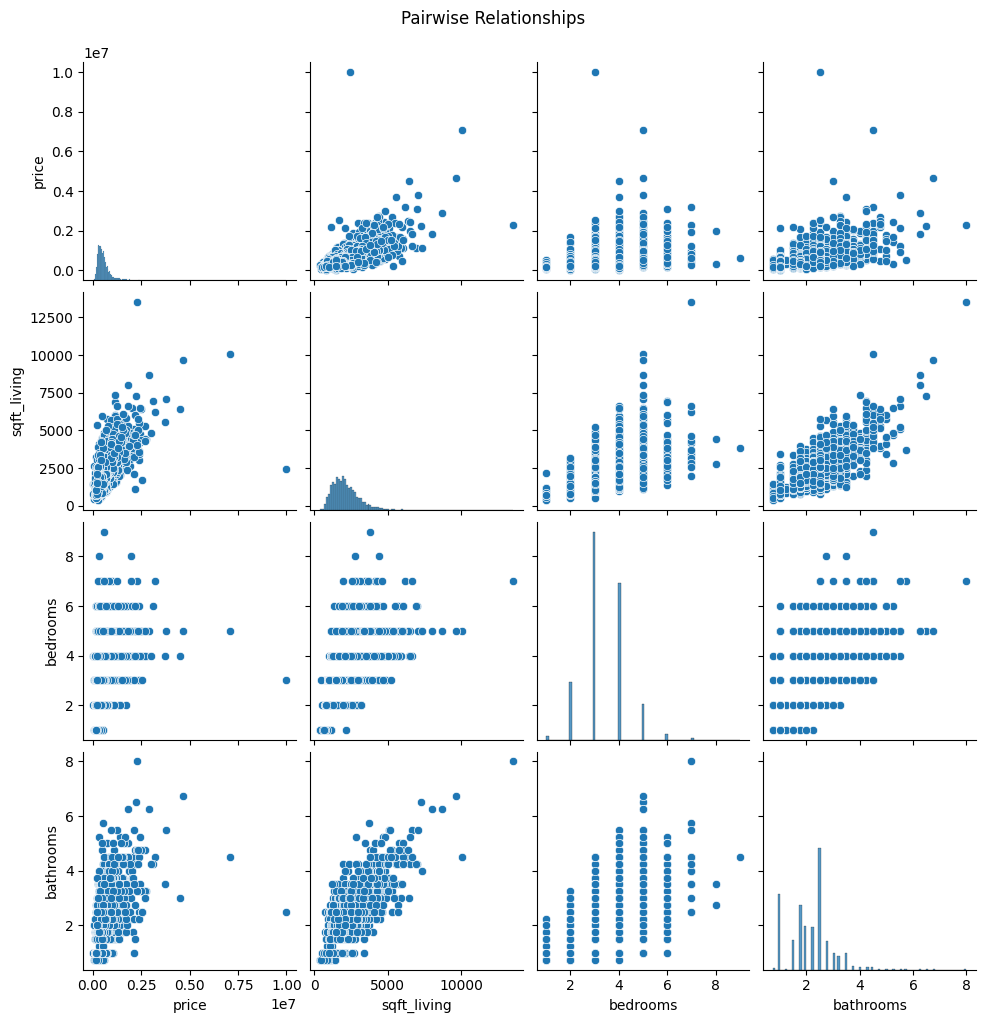

In [214]:
# Pairplot to see interactions
sns.pairplot(ds[['price', 'sqft_living', 'bedrooms', 'bathrooms']])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

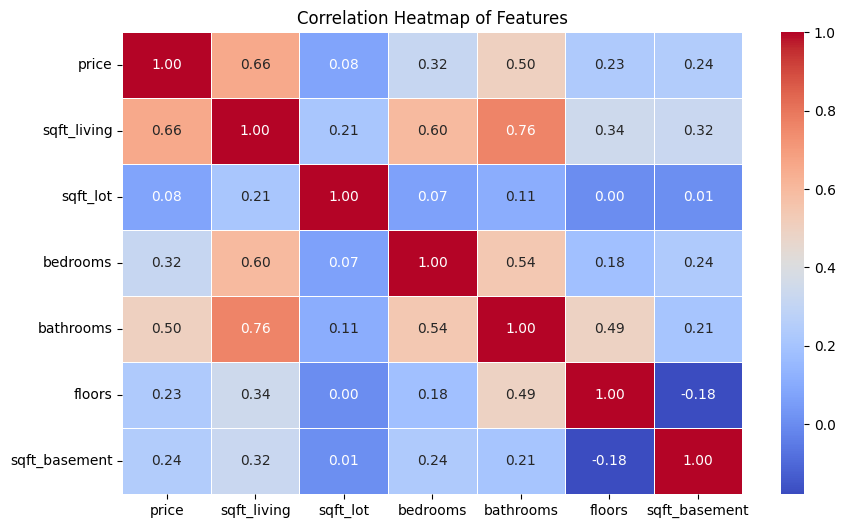

In [215]:
# Heatmap of correlation
plt.figure(figsize=(10, 6))
corr = ds[['price', 'sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms', 'floors', 'sqft_basement']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

In [216]:
#Visualization

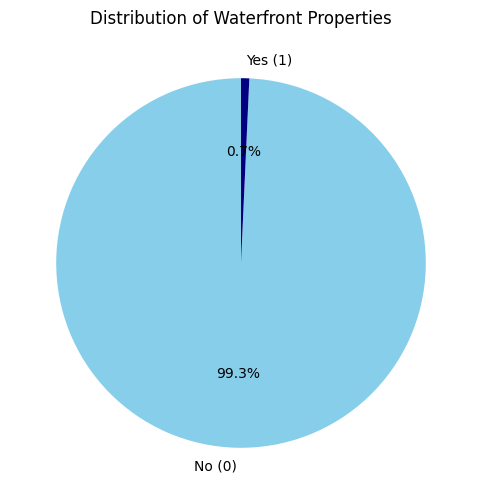

In [217]:
waterfront_counts = ds['waterfront'].value_counts().sort_index()
labels = ['No (0)', 'Yes (1)']

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(waterfront_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'navy'])
plt.title('Distribution of Waterfront Properties')
plt.show()


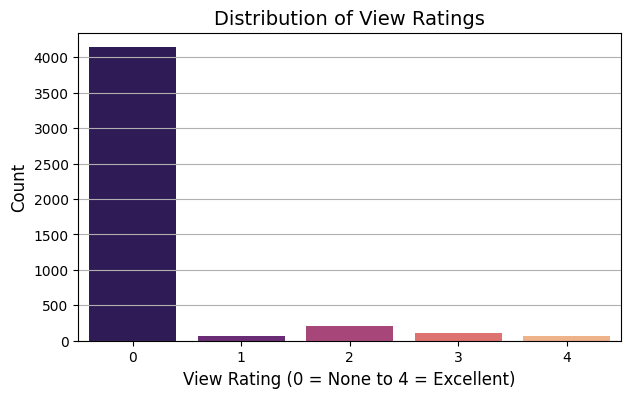

In [218]:
plt.figure(figsize=(7, 4))
sns.countplot(x='view', data=ds, palette='magma')
plt.title('Distribution of View Ratings', fontsize=14)
plt.xlabel('View Rating (0 = None to 4 = Excellent)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y')
plt.show()


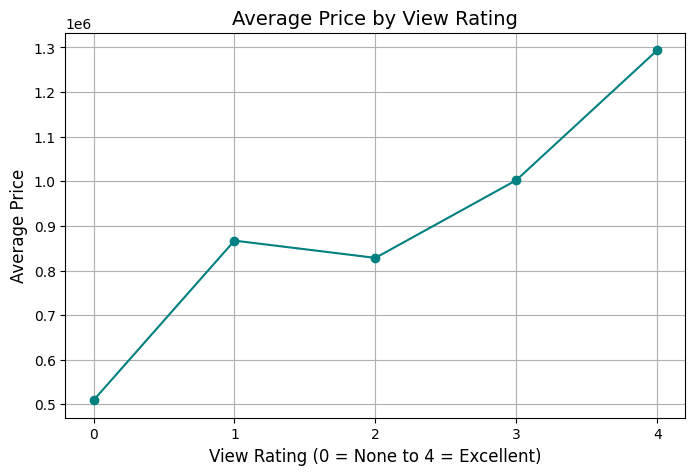

In [219]:
# Calculate average price per view rating
avg_price_by_view = ds.groupby('view')['price'].mean().sort_index()

# Plot line chart
plt.figure(figsize=(8, 5))
plt.plot(avg_price_by_view.index, avg_price_by_view.values, marker='o', color='teal', linestyle='-')
plt.title('Average Price by View Rating', fontsize=14)
plt.xlabel('View Rating (0 = None to 4 = Excellent)', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.grid(True)
plt.xticks(avg_price_by_view.index)
plt.show()



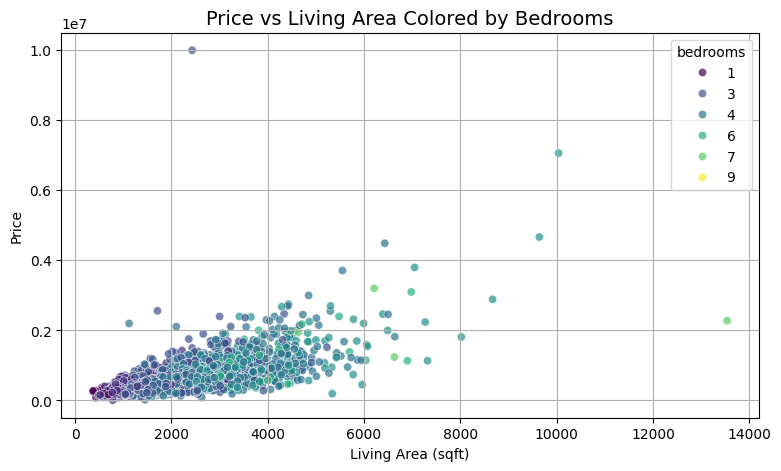

In [220]:
plt.figure(figsize=(9, 5))
sns.scatterplot(x='sqft_living', y='price', data=ds, hue='bedrooms', palette='viridis', alpha=0.7)
plt.title('Price vs Living Area Colored by Bedrooms', fontsize=14)
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price')
plt.grid(True)
plt.show()


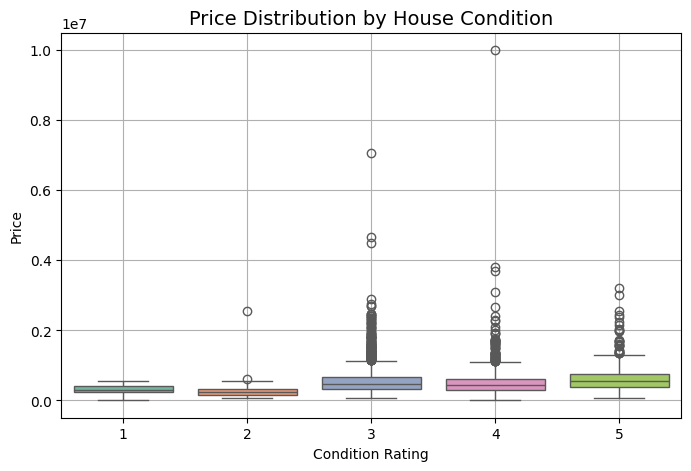

In [221]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='condition', y='price', data=ds, palette='Set2')
plt.title('Price Distribution by House Condition', fontsize=14)
plt.xlabel('Condition Rating')
plt.ylabel('Price')
plt.grid(True)
plt.show()


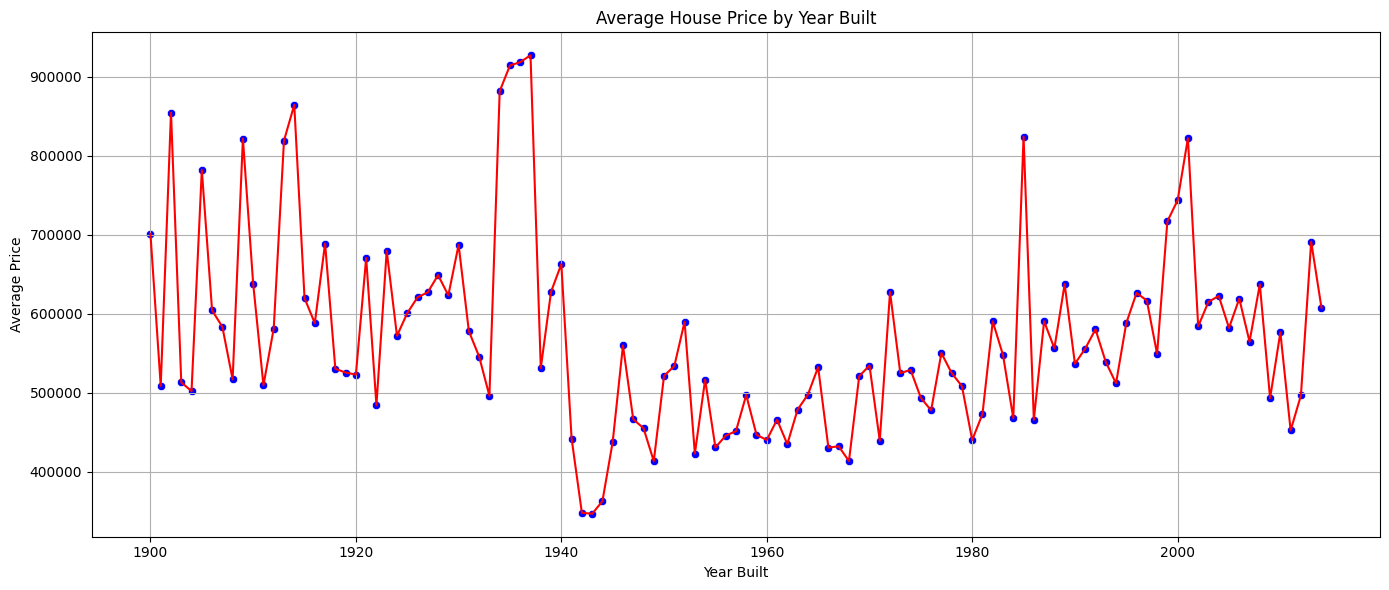

In [222]:
avg_price_by_year = ds.groupby('yr_built')['price'].mean().reset_index()
plt.figure(figsize=(14, 6))
sns.scatterplot(x='yr_built', y='price', data=avg_price_by_year, color='blue')
sns.lineplot(x='yr_built', y='price', data=avg_price_by_year, color='red')
plt.title('Average House Price by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Average Price')
plt.grid(True)
plt.tight_layout()
plt.show()


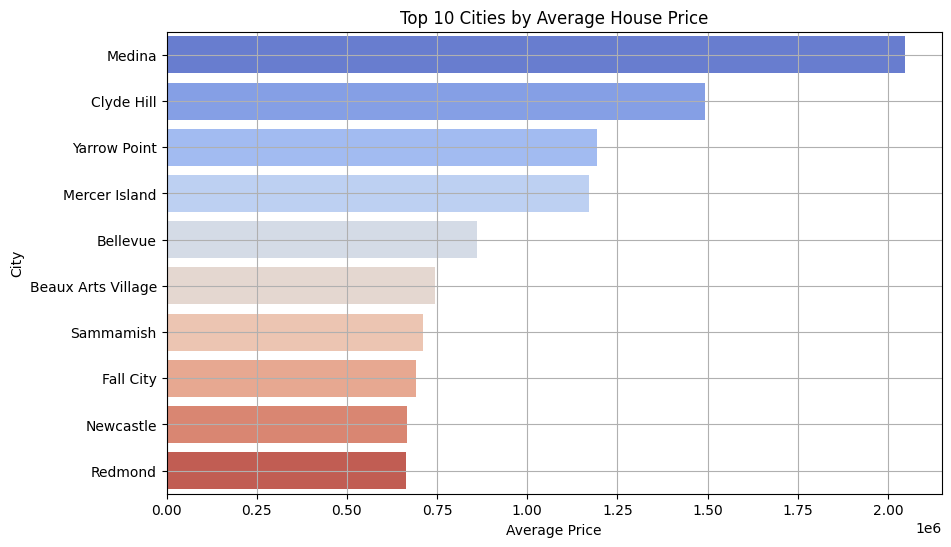

In [223]:
# Top 10 cities with highest average prices
top_cities = ds.groupby('city')['price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='coolwarm')
plt.title('Top 10 Cities by Average House Price')
plt.xlabel('Average Price')
plt.ylabel('City')
plt.grid(True)
plt.show()


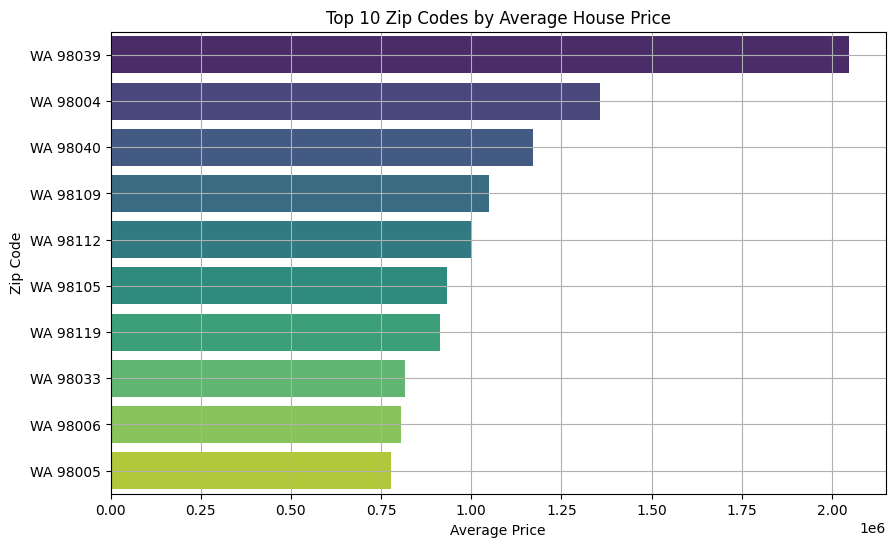

In [224]:
# Top 10 zip codes with highest average prices
top_zips = ds.groupby('statezip')['price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_zips.values, y=top_zips.index, palette='viridis')
plt.title('Top 10 Zip Codes by Average House Price')
plt.xlabel('Average Price')
plt.ylabel('Zip Code')
plt.grid(True)
plt.show()

In [225]:
#Feature Engineering

In [226]:
 #Age of the Property

In [227]:
import datetime
current_year = datetime.datetime.now().year
ds['property_age'] = current_year - ds['yr_built']

In [228]:
ds['renovated'] = ds['yr_renovated'].apply(lambda x: 0 if x == 0 else current_year - x)

In [229]:
ds['price_per_sqft'] = ds['price'] / ds['total_sqft']

In [230]:
# 1. Extract full bathrooms
ds['full_bathrooms'] = ds['bathrooms'].astype(int)

# 2. Extract fractional part
ds['bathroom_fraction'] = ds['bathrooms'] - ds['full_bathrooms']

# 3. One-hot encode known fractions
ds['quarter_bath'] = (ds['bathroom_fraction'] == 0.25).astype(int)
ds['half_bath'] = (ds['bathroom_fraction'] == 0.5).astype(int)
ds['three_quarter_bath'] = (ds['bathroom_fraction'] == 0.75).astype(int)


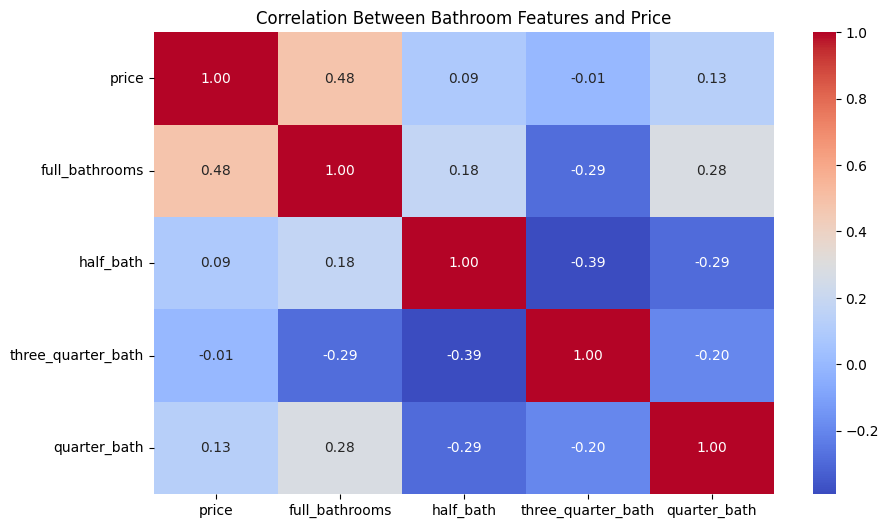

In [231]:
bath_features = ds[['price', 'full_bathrooms', 'half_bath', 'three_quarter_bath', 'quarter_bath']]

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(bath_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Bathroom Features and Price")
plt.show()

 Key Insights:
 1. full_bathrooms has the strongest positive correlation with price (0.48)
This means houses with more full bathrooms tend to have significantly higher prices.

It's a strong feature to retain or even prioritize in modeling.

 2. quarter_bath shows a weak positive correlation with price (0.13)
Adds some value to the property, but not much.

May have less influence compared to full baths.

 3. half_bath (0.09) and three_quarter_bath (-0.01) have minimal or no correlation with price
These have little to no influence on property price in your dataset.

three_quarter_bath even has a slight negative correlation, meaning more of them might slightly lower the price — possibly due to them being common in cheaper/older houses.

 4. Bathroom types are negatively correlated with each other
e.g., full_bathrooms vs three_quarter_bath: -0.29
Indicates if a house has more full baths, it’s less likely to have ¾ or half baths, and vice versa.


In [232]:
import numpy as np
ds['full_floor'] = np.floor(ds['floors']).astype(int)
ds['has_attic'] = (ds['floors'] % 1 != 0).astype(int)

In [235]:
ds[['price','total_sqft','price_per_sqft','property_age','full_bathrooms','full_floor']].head()

,price,total_sqft,price_per_sqft,property_age,full_bathrooms,full_floor
0,313000,1340.0,233.582090,70,1,1
1,2384000,3930.0,606.615776,104,2,2
2,342000,1930.0,177.202073,59,2,1
3,420000,3000.0,140.000000,62,2,1
4,550000,2740.0,200.729927,49,2,1


In [237]:
ds.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,property_age,renovated,price_per_sqft,full_bathrooms,bathroom_fraction,quarter_bath,half_bath,three_quarter_bath,full_floor,has_attic
count,4.598000e+03,4598.000000,4598.000000,4598.00000,4.598000e+03,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000,...,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000
mean,5.531827e+05,3.402349,2.161755,2136.77077,1.483730e+04,1.511527,0.007177,0.240322,3.451936,1839.913658,...,54.173554,12.395607,238.344660,1.789691,0.372064,0.127664,0.364506,0.210526,1.458678,0.105698
std,3.939959e+05,0.906273,0.782654,960.22191,3.587493e+04,0.537558,0.084422,0.778133,0.677312,969.760601,...,29.656387,20.266762,115.862923,0.751423,0.281269,0.333752,0.481344,0.407727,0.551788,0.307484
min,7.800000e+03,1.000000,0.750000,370.00000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,350.000000,...,11.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3.271250e+05,3.000000,1.750000,1470.00000,5.001250e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,...,28.000000,0.000000,162.791553,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,4.658000e+05,3.000000,2.250000,1980.00000,7.683500e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,...,49.000000,0.000000,220.477184,2.000000,0.500000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,6.600000e+05,4.000000,2.500000,2610.00000,1.100000e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,...,74.000000,22.000000,286.319760,2.000000,0.500000,0.000000,1.000000,0.000000,2.000000,0.000000
max,1.000000e+07,9.000000,8.000000,13540.00000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,20450.000000,...,125.000000,113.000000,3039.513678,8.000000,0.750000,1.000000,1.000000,1.000000,3.000000,1.000000


In [70]:
#Stats

In [71]:
#T-Test Independent
from scipy.stats import ttest_ind

# Perform T-test
t_stat, p_val = ttest_ind(ds[ds['has_attic'] == 1]['price'],
                          ds[ds['has_attic'] == 0]['price'])

print(f"T-statistic: {t_stat:.2f}, P-value: {p_val:.4f}")

# Conclusion
if p_val < 0.05:
    print("Result: Reject the null hypothesis – attic presence has a significant effect on price.")
else:
    print("Result: Failed to reject the null hypothesis – attic presence does not significantly affect price.")



T-statistic: 3.95, P-value: 0.0001
Result: Reject the null hypothesis – attic presence has a significant effect on price.


Notes :
 1. If p-value < 0.05, it means there is strong evidence that attic presence does affect price → we reject the null hypothesis.

 2. If p-value ≥ 0.05, we fail to reject the null → there’s no strong evidence of a price difference due to attic presence.

In [72]:
from scipy.stats import chi2_contingency
import pandas as pd

# Test 2: View vs Has Attic
contingency2 = pd.crosstab(ds['view'], ds['has_attic'])
chi2_2, p_2, dof_2, expected_2 = chi2_contingency(contingency2)

print("View vs Has Attic:")
print(f"Chi2: {chi2_2:.2f}, p-value: {p_2:.4f}")
if p_2 < 0.05:
    print("→ Reject the null hypothesis: There's a significant relationship.")
else:
    print("→ Fail to reject the null hypothesis: No significant relationship.")



View vs Has Attic:
Chi2: 6.33, p-value: 0.1761
→ Fail to reject the null hypothesis: No significant relationship.
